# **--------------Walmart - Multinational Retail Corporation-----------------**

*   Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**The Management team at Walmart Inc. wants**:
*   Analyze the customer purchase behavior (specifically, purchase amount)against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

*   The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.
*   The dataset has the following features:

*   **User_ID**:	User ID
*   **Product_ID**:	Product ID
*   **Gender**:	Sex of User
*   **Age**:	Age in bins
*   **Occupation**:	Occupation(Masked)
*   **City_Category**:	Category of the City (A,B,C)
*   **StayInCurrentCityYears**:	Number of years stay in current city
*   **Marital_Status**:	Marital Status
*   **ProductCategory**:	Product Category (Masked)
*   **Purchase**:	Purchase Amount

*   **Importing necessary packages for EDA**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*   **Importing/Reading the dataset for EDA**

In [ ]:
W=pd.read_csv("walmart_data.csv")

In [ ]:
W.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Structure and characteristics of the dataset


*   Shape Of The Dataset

In [ ]:
W.shape

(550068, 10)

The Dataset is of 10 columns with 550068 rows.



* Data types of the all columns

In [ ]:
W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


1.   Here in the dataset there are no null values.
2.   The datatypes of most of the columns are float and few objects and integers.

In [ ]:
W['User_ID'].nunique()

5891

In [ ]:
W.groupby('Gender')['User_ID'].nunique()

,User_ID
Gender,
F,1666
M,4225




*   There are 5891 users in the dataset.
*   Out of 5891 users 4225 are males and 1666 are females.



# Detecting Outliers

**Outliers for the "Purchase" column**

Statistics of the "Purchase" column


1.   Mean
2.   Median



In [ ]:
W.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0




*   Here mean purchase by female is 8734.54 and the median purchase is 7914.0.


*   Here mean purchase by male is 9437.52 and the median purchase is 8098.0.





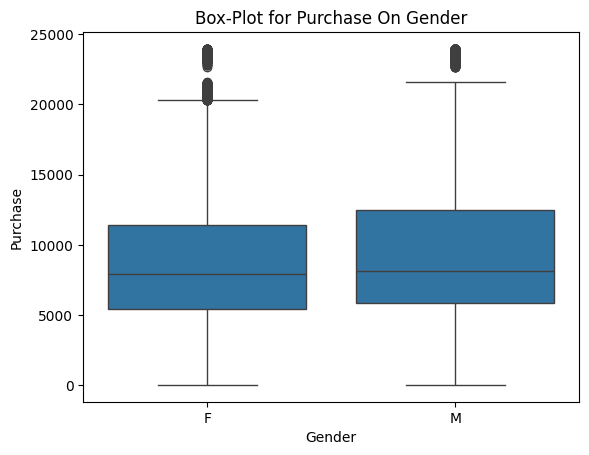

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=W)
plt.title('Box-Plot for Purchase On Gender')
plt.show()

In [ ]:
W_M = W.loc[W['Gender']== 'M']
W_F = W.loc[W['Gender']== 'F']

**Outliers in the Purchases made by Male**

In [ ]:
# finding the 1st Quartile
Q1 = np.quantile(W_M['Purchase'], 0.25)

# finding the 3rd Quartile
Q3 = np.quantile(W_M['Purchase'], 0.75)

# finding the Inter-Quartile-Range(IQR) region
IQR = Q3-Q1

# finding upper and lower whiskers
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print(IQR, lower_bound, upper_bound)

6591.0 -4023.5 22340.5


In [ ]:
outliers = W_M['Purchase'][(W_M['Purchase'] <= lower_bound) | (W_M['Purchase'] >= upper_bound)]
print(outliers)

343       23603
652       23233
1445      23826
1902      23139
3166      23159
          ...  
543995    23945
544417    23284
544488    23753
545663    23663
545787    23496
Name: Purchase, Length: 1812, dtype: int64




*   Among all the purchases made by the male's there are 1812 purchases considered as outliers.


**Outliers in the Purchases made by Females**

In [ ]:
# finding the 1st Quartile
Q1 = np.quantile(W_F['Purchase'], 0.25)

# finding the 3rd Quartile
Q3 = np.quantile(W_F['Purchase'], 0.75)

# finding the Inter-Quartile-Range(IQR) region
IQR = Q3-Q1

# finding upper and lower whiskers
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print(IQR, lower_bound, upper_bound)

5967.0 -3517.5 20350.5


In [ ]:
outliers = W_F['Purchase'][(W_F['Purchase'] <= lower_bound) | (W_F['Purchase'] >= upper_bound)]
print(outliers)

375       23792
731       21002
736       23595
1041      23341
1106      20771
          ...  
545461    20634
545618    20743
545834    20616
545856    20766
545864    21390
Name: Purchase, Length: 2065, dtype: int64




*   Among all the purchases made by the female's there are 2065 purchases considered as outliers.


# DATA EXPLORATION



*   Computing the average female and male expenses



In [ ]:
W.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0




*   Here mean purchase by female is 8734.56 and the median purchase is 7914.0.


*   Here mean purchase by male is 9437.52 and the median purchase is 8098.0.





In [ ]:
sample_size = 300
iterations = 1000
Pmean_M = []
Pmean_F=[]
for i in range(iterations):
    Pmean_M.append(
    W_M.sample(sample_size)['Purchase'].mean())
    Pmean_F.append(
    W_F.sample(sample_size)['Purchase'].mean())

9436.698716666668


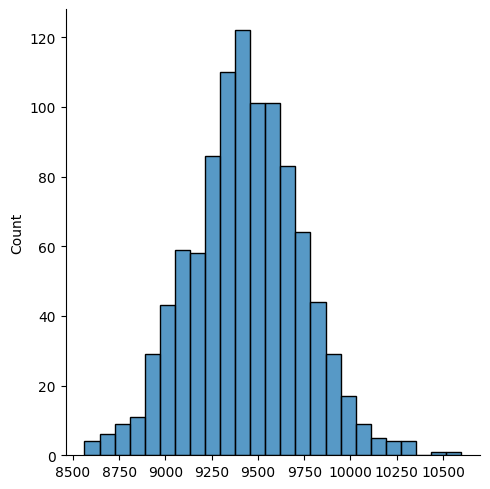

In [ ]:
print(np.mean(Pmean_M))
sns.displot(Pmean_M, bins=25)
plt.show()

8722.79547


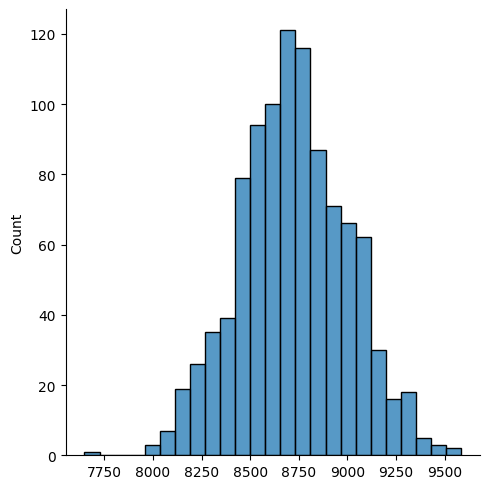

In [ ]:
print(np.mean(Pmean_F))
sns.displot(Pmean_F, bins=25)
plt.show()



*   From the above graphs, both the sample mean of males & females lies in the range of population means of both males and females respectively.



**Are women spending more money per transaction than men? Why or Why not?**





*   Ho: Women mean spend < men mean spend
*   Ha : Women mean spend > men mean spend



In [ ]:
W_F['Purchase'].mean()

8734.565765155476

In [ ]:
W_M['Purchase'].mean()

9437.526040472265

In [ ]:
from scipy.stats import ttest_ind
t_stats,p_value = ttest_ind(W_F['Purchase'],W_M['Purchase'],alternative='greater')
print("t_stats:",t_stats)
print("p_value:",p_value)
alpha = 0.05 # Since checking for 95 % confidence level
if p_value < alpha:
  print(" Reject the Null hypothesis ")
else:
  print(" Fail to reject the Null Hypothesis")

t_stats: -44.837957934353966
p_value: 1.0
 Fail to reject the Null Hypothesis




*   Women spend less than Men Spend



# Central Limit Theorem - Confidence Interval





*   **Percentile method**



**90% Confidence Interval**

In [ ]:
print('Male')
print(np.percentile(Pmean_M,[5,95]))

Male
[8952.339      9921.95083333]


In [ ]:
print('Female')
print(np.percentile(Pmean_F,[5,95]))

Female
[8256.95566667 9181.202     ]


**95% Confidence Interval**

In [ ]:
print('Male')
print(np.percentile(Pmean_M,[2.5,97.5]))

Male
[ 8840.47358333 10012.681     ]


In [ ]:
print('Female')
print(np.percentile(Pmean_F,[2.5,97.5]))

Female
[8175.03141667 9281.90341667]


**99% Confidence Interval**

In [ ]:
print('Male')
print(np.percentile(Pmean_M,[0.05,99.5]))

Male
[ 8577.16502333 10275.84515   ]


In [ ]:
print('Female')
print(np.percentile(Pmean_F,[0.05,99.5]))

Female
[7825.17749167 9416.04465   ]




# Married VS Unmarried



In [ ]:
W_m = W.loc[W['Marital_Status']== 1]
W_um = W.loc[W['Marital_Status']== 0]

Married - Male VS Female

In [ ]:
W_m.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,56988.0,8810.249789,4803.594163,12.0,5456.75,7939.0,11451.0,23959.0
M,168349.0,9413.817605,5078.027482,12.0,5874.00,8094.0,12312.0,23961.0




*   Here mean purchase by married female's is 8810.24 and their median purchase is 7939.0.


*   Here mean purchase by married male's is 9413.81 and their median purchase is 8094.0.





Unmarried - Male VS Female

In [ ]:
W_um.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,78821.0,8679.845815,4740.048367,12.0,5417.0,7895.0,11370.0,23955.0
M,245910.0,9453.756740,5101.803346,12.0,5854.0,8101.0,12543.0,23961.0




*   Here mean purchase by Unmarried female's is 8679.84 and their median purchase is 7895.0.


*   Here mean purchase by Unmarried male's is 9453.75 and their median purchase is 8101.0.





In [ ]:
sample_size = 300
iterations = 1000
Pmean_um = []
Pmean_m=[]
for i in range(iterations):
    Pmean_m.append(
    W_m.sample(sample_size)['Purchase'].mean())
    Pmean_um.append(
    W_um.sample(sample_size)['Purchase'].mean())

9256.913273333334


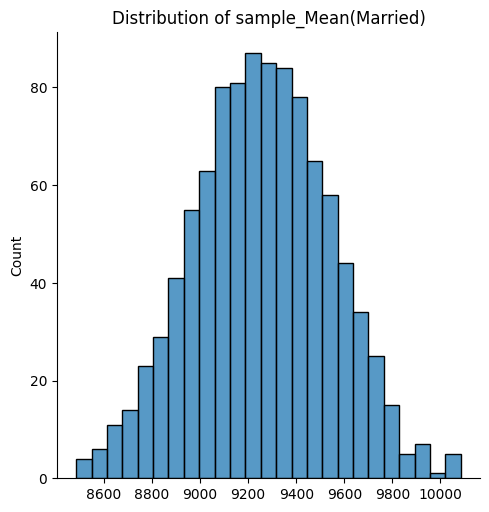

In [ ]:
print(np.mean(Pmean_m))
sns.displot(Pmean_m, bins=25)
plt.title('Distribution of sample_Mean(Married)')
plt.show()

9267.224043333334


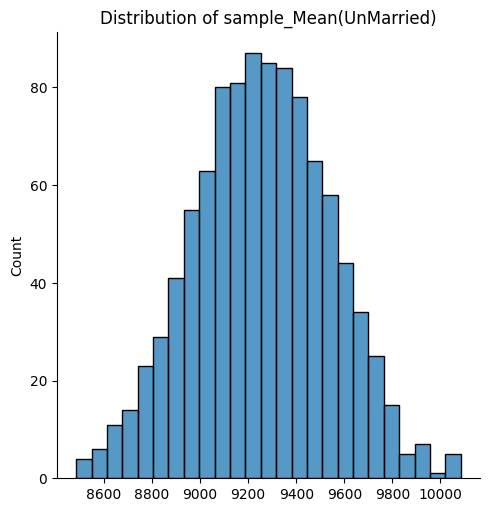

In [ ]:
print(np.mean(Pmean_um))
sns.displot(Pmean_m, bins=25)
plt.title('Distribution of sample_Mean(UnMarried)')
plt.show()



*   **Confidence Intervals**

90% confidence Interval

In [ ]:
print('Married')
print(np.percentile(Pmean_m,[5,95]))

Married
[8784.94183333 9716.84783333]


In [ ]:
print('UnMarried')
print(np.percentile(Pmean_um,[5,95]))

UnMarried
[8770.66283333 9757.54      ]


95% confidence Interval

In [ ]:
print('Married')
print(np.percentile(Pmean_m,[2.5,97.5]))

Married
[8708.65175 9793.09375]


In [ ]:
print('UnMarried')
print(np.percentile(Pmean_um,[2.5,97.5]))

UnMarried
[8670.87333333 9862.2145    ]


99% confidence Interval

In [ ]:
print('Married')
print(np.percentile(Pmean_m,[0.05,99.5]))

Married
[8485.22413833 9997.21948333]


In [ ]:
print('UnMarried')
print(np.percentile(Pmean_um,[0.05,99.5]))

UnMarried
[ 8275.78151167 10018.57738333]


# **AGE**

In [ ]:
W.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


*   Here mean purchase by Age group '0-17' is 8933.46 and their median purchase is 7986.0.
*   Here mean purchase by Age group '18-25' is 9169.66 and their median purchase is 8027.0.
*   Here mean purchase by Age group '26-35' is 9252.69 and their median purchase is 8030.0.
*   Here mean purchase by Age group '36-45' is 93311.35 and their median purchase is 8061.0.
*   Here mean purchase by Age group '46-50' is 9208.62 and their median purchase is 8036.0.
*   Here mean purchase by Age group '51-55' is 9534.80 and their median purchase is 8130.0.
*   Here mean purchase by Age group '55+' is 9336.28 and their median purchase is 8105.5.


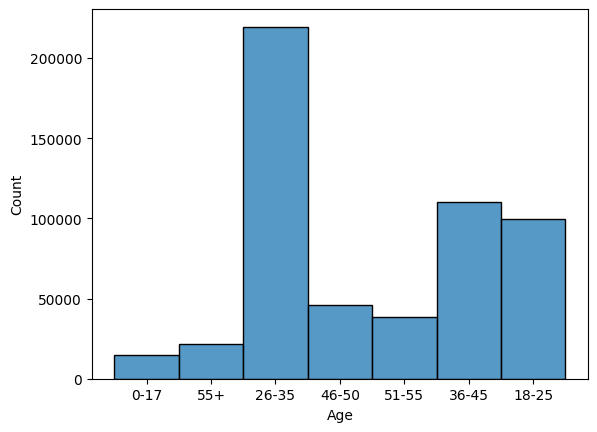

In [ ]:
sns.histplot(data = W, x= W['Age'])
plt.show()

In [ ]:
A_0 = W.loc[W['Age']== '0-17']
A_1 = W.loc[W['Age']== '18-25']
A_2 = W.loc[W['Age']== '26-35']
A_3 = W.loc[W['Age']== '36-45']
A_4 = W.loc[W['Age']== '46-50']
A_5 = W.loc[W['Age']== '51-55']
A_6 = W.loc[W['Age']== '55+']

In [ ]:
sample_size = 300
iterations = 1000
A0_Mean = []
A1_Mean = []
A2_Mean = []
A3_Mean = []
A4_Mean = []
A5_Mean = []
A6_Mean = []
for i in range(iterations):
    A0_Mean.append(
    A_0.sample(sample_size)['Purchase'].mean())
    A1_Mean.append(
    A_1.sample(sample_size)['Purchase'].mean())
    A2_Mean.append(
    A_2.sample(sample_size)['Purchase'].mean())
    A3_Mean.append(
    A_3.sample(sample_size)['Purchase'].mean())
    A4_Mean.append(
    A_4.sample(sample_size)['Purchase'].mean())
    A5_Mean.append(
    A_5.sample(sample_size)['Purchase'].mean())
    A6_Mean.append(
    A_6.sample(sample_size)['Purchase'].mean())

8926.02502


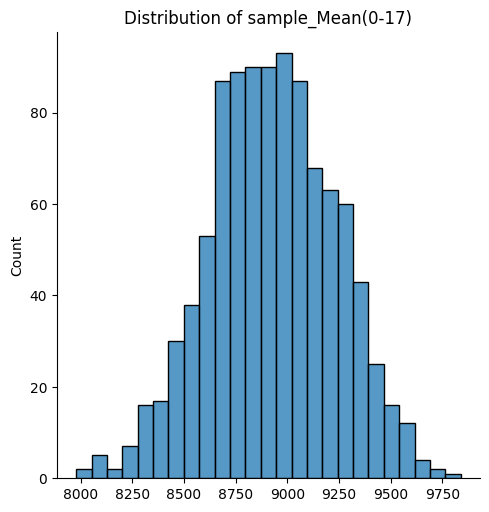

In [ ]:
print(np.mean(A0_Mean))
sns.displot(A0_Mean, bins=25)
plt.title('Distribution of sample_Mean(0-17)')
plt.show()

9185.418296666667


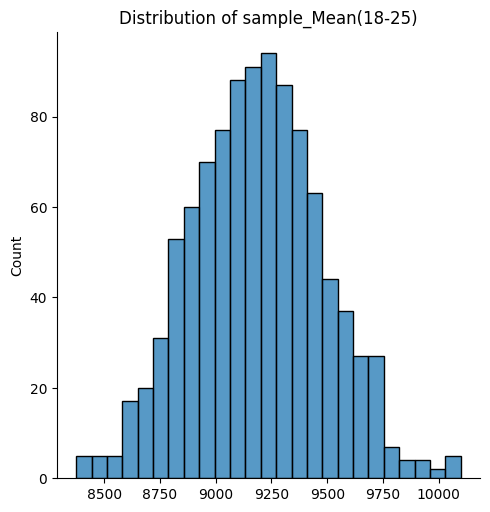

In [ ]:
print(np.mean(A1_Mean))
sns.displot(A1_Mean, bins=25)
plt.title('Distribution of sample_Mean(18-25)')
plt.show()

9258.736373333335


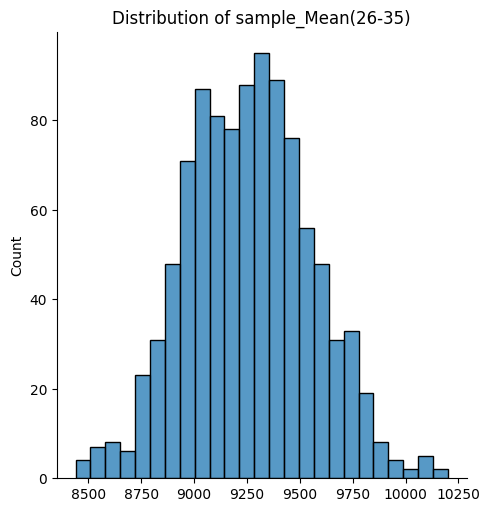

In [ ]:
print(np.mean(A2_Mean))
sns.displot(A2_Mean, bins=25)
plt.title('Distribution of sample_Mean(26-35)')
plt.show()

9349.405480000001


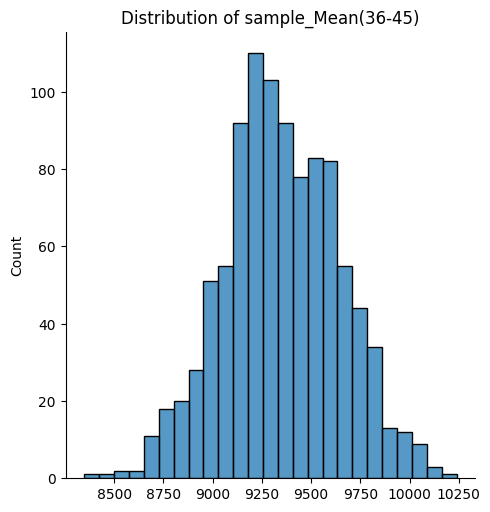

In [ ]:
print(np.mean(A3_Mean))
sns.displot(A3_Mean, bins=25)
plt.title('Distribution of sample_Mean(36-45)')
plt.show()

9203.37877


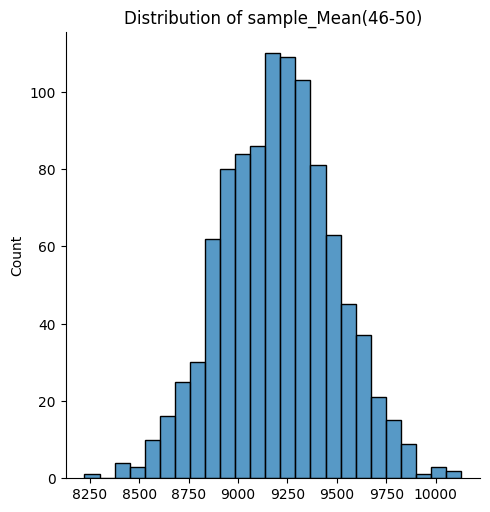

In [ ]:
print(np.mean(A4_Mean))
sns.displot(A4_Mean, bins=25)
plt.title('Distribution of sample_Mean(46-50)')
plt.show()

9526.329853333333


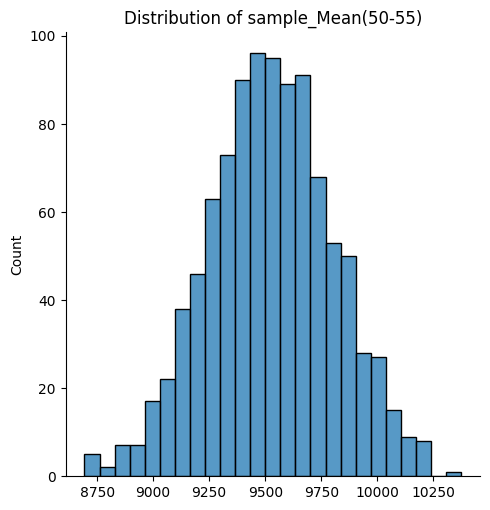

In [ ]:
print(np.mean(A5_Mean))
sns.displot(A5_Mean, bins=25)
plt.title('Distribution of sample_Mean(50-55)')
plt.show()

9331.029260000001


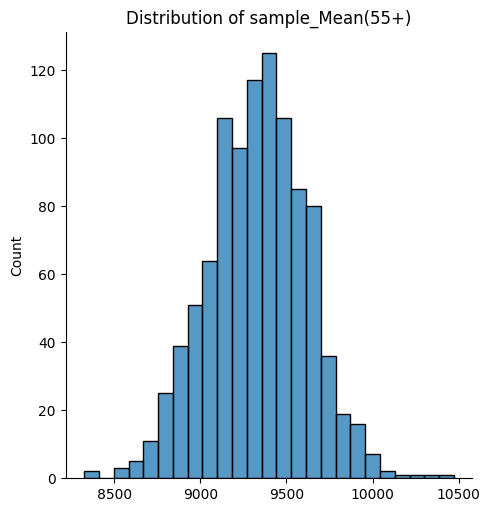

In [ ]:
print(np.mean(A6_Mean))
sns.displot(A6_Mean, bins=25)
plt.title('Distribution of sample_Mean(55+)')
plt.show()

# **Recommendations**



*  26-35 year of age persons need to be focused as they are the most buyers among all age group the marketing startegy and products availability should be around these age group interest so that these people get retained.

*  Women spends less compared to men. So womens good items need to be updated for more choices of purchase so that women could buy more.

*  95% is considered standard and 300 sample is decent choice for predicting interval where population mean value will lies.

*   On Black friday women spend less than men so womens should be given incentives on that particular day through offers etc.

